In [1]:
!pip install -q pymcel

### 08.08.23

In [31]:
from astroquery.jplhorizons import Horizons
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
earth=Horizons(id='Geocenter',location='@Sun',
         epochs=dict(start='2023-01-01 00:00:00',stop='2023-12-31 00:00:00',step='1d')).vectors().to_pandas()   #Geocenter, para no generar conflicto con otras cosas. El start debe ser antes del stop

In [17]:
earth[['x','y','z']]  #buscar las unidades en la tabla de astropy [x]=AU

,x,y,z
0,-0.170256,0.968485,-0.000049
1,-0.187448,0.965286,-0.000049
2,-0.204581,0.961787,-0.000050
3,-0.221650,0.957990,-0.000050
4,-0.238649,0.953896,-0.000050
...,...,...,...
360,-0.079157,0.980260,-0.000057
361,-0.096565,0.978659,-0.000057
362,-0.113944,0.976756,-0.000056
363,-0.131288,0.974549,-0.000056


In [6]:
from astropy import constants   #puedo buscar constantes

In [8]:
import numpy as np

In [9]:
r_earth=np.array(earth[['x','y','z']]*au)

In [10]:
r_earth

array([[-2.54699305e+10,  1.44883365e+11, -7.30939320e+06],
       [-2.80418811e+10,  1.44404696e+11, -7.36418895e+06],
       [-3.06049407e+10,  1.43881253e+11, -7.41508123e+06],
       ...,
       [-1.70457588e+10,  1.46120546e+11, -8.43687198e+06],
       [-1.96403915e+10,  1.45790492e+11, -8.38341110e+06],
       [-2.22290616e+10,  1.45415238e+11, -8.30883538e+06]])

In [11]:
import matplotlib.pyplot as plt

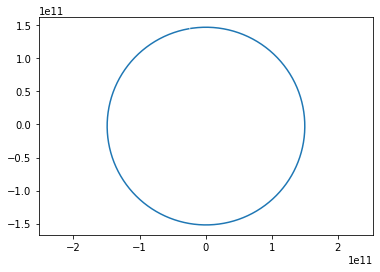

In [12]:
plt.plot(r_earth[:,0],r_earth[:,1])
plt.axis('equal');

In [13]:
#Buscar la convención para los cuerpos en astroquery

### 10.08.23

Aceleración de la Luna

$$\ddot{\vec{r}}_3=-\frac{\mu_1\vec{r}_{31}}{{r_{31}}^3}-\frac{\mu_2\vec{r}_{32}}{{r_{32}}^3}$$

JPL > Astrodynamical Parameters

In [14]:
au=constants.au.value
G=constants.G.value
μsun=G*constants.M_sun.value
μearth=G*constants.M_earth.value
μmoon=4902.800118*1e9 #convertir a m³/s²

In [19]:
earth=Horizons(id='Geocenter',location='@0',
         epochs=dict(start='2023-01-01 00:00:00',stop='2023-12-31 00:00:00',step='1d')).vectors().to_pandas() 

r_earth=np.array(earth[['x','y','z']]*au)

sun=Horizons(id='10',location='@0',
         epochs=dict(start='2023-01-01 00:00:00',stop='2023-12-31 00:00:00',step='1d')).vectors().to_pandas() 

r_sun=np.array(sun[['x','y','z']]*au)

moon=Horizons(id='301',location='@0',
         epochs=dict(start='2023-01-01 00:00:00',stop='2023-12-31 00:00:00',step='1d')).vectors().to_pandas() 

r_moon=np.array(moon[['x','y','z']]*au)

Calcular los vectores relativos y sus magnitudes

In [20]:
r_31s=r_moon-r_sun
r_32s=r_moon-r_earth

In [22]:
r_31=np.linalg.norm(r_31s,axis=1)  #axis 1 aplica la rutina en dirección de las columnas; axis 0 lo hace en las filas
r_32=np.linalg.norm(r_32s,axis=1)

Calcular las aceleraciones

In [26]:
N = len(r_31)
a3s=np.zeros((N,3))
for i in range(N):
    a3s[i]=-μsun*r_31s[i,:]/r_31[i]**3-μearth*r_32s[i,:]/r_32[i]**3

In [28]:
a3s

array([[-1.14985925e-03, -7.47280403e-03,  3.36983711e-05],
       [-6.35909893e-04, -7.85055543e-03, -1.75602101e-05],
       [-6.65161114e-05, -8.12347570e-03, -6.50613574e-05],
       ...,
       [ 1.94364442e-03, -8.23822590e-03, -2.18046076e-04],
       [ 2.46559199e-03, -7.89148318e-03, -2.03528511e-04],
       [ 2.90461263e-03, -7.48172985e-03, -1.81109742e-04]])

In [30]:
a3v=np.array([-μsun*r_31s[i,:]/r_31[i]**3-μearth*r_32s[i,:]/r_32[i]**3 for i in range(len(r_31))])
a3v

array([[-1.14985925e-03, -7.47280403e-03,  3.36983711e-05],
       [-6.35909893e-04, -7.85055543e-03, -1.75602101e-05],
       [-6.65161114e-05, -8.12347570e-03, -6.50613574e-05],
       ...,
       [ 1.94364442e-03, -8.23822590e-03, -2.18046076e-04],
       [ 2.46559199e-03, -7.89148318e-03, -2.03528511e-04],
       [ 2.90461263e-03, -7.48172985e-03, -1.81109742e-04]])

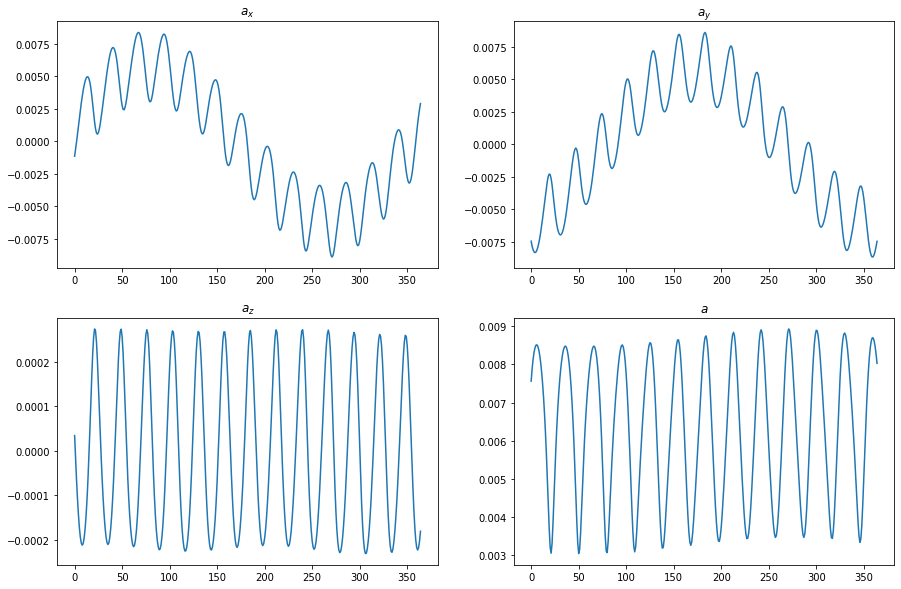

In [42]:
t=range(N)
a3x,a3y,a3z,a=a3v[:,0],a3v[:,1],a3v[:,2],np.linalg.norm(a3v,axis=1)

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(t,a3x)
plt.title(r'$a_x$')

plt.subplot(2,2,2)
plt.plot(t,a3y)
plt.title(r'$a_y$')

plt.subplot(2,2,3)
plt.plot(t,a3z)
plt.title(r'$a_z$')

plt.subplot(2,2,4)
plt.plot(t,a)
plt.title(r'$a$')

plt.show()


### 15.08.23

In [21]:
from astroquery.jplhorizons import Horizons
from astropy import constants
import numpy as np

au=constants.au.value
G=constants.G.value

μsun=G*constants.M_sun.value
μearth=G*constants.M_earth.value
μmoon=4902.800118*1e9

earth=Horizons(id='399',location='@0',
         epochs=dict(start='2023-01-25 12:00:00',stop='2023-01-26 00:00:00',step='1d')).vectors().to_pandas() 

r_earth=np.array(earth[['x','y','z']]*au)

sun=Horizons(id='10',location='@0',
         epochs=dict(start='2023-01-25 12:00:00',stop='2023-01-26 00:00:00',step='1d')).vectors().to_pandas() 

r_sun=np.array(sun[['x','y','z']]*au)

moon=Horizons(id='301',location='@0',
         epochs=dict(start='2023-01-25 12:00:00',stop='2023-01-26 00:00:00',step='1d')).vectors().to_pandas() 

r_moon=np.array(moon[['x','y','z']]*au)

r_31s=r_moon-r_sun
r_32s=r_moon-r_earth

r_31=np.linalg.norm(r_31s,axis=1)
r_32=np.linalg.norm(r_32s,axis=1)

a_suns=-μsun*r_31s/r_31**3
a_earths=-μearth*r_32s/r_32**3

a_sun=np.linalg.norm(a_suns)
a_earth=np.linalg.norm(a_earths)

rat=a_sun/a_earth

rat

2.089474691229366

### 17.08.23

Documentación: https://naif.jpl.nasa.gov/pub/naif/toolkit_docs/C/cspice/bodvrd_c.html

Datos: https://naif.jpl.nasa.gov/pub/naif/generic_kernels/

In [2]:
!wget https://naif.jpl.nasa.gov/pub/naif/generic_kernels/pck/gm_de440.tpc

--2023-08-17 09:19:21--  https://naif.jpl.nasa.gov/pub/naif/generic_kernels/pck/gm_de440.tpc
Resolviendo naif.jpl.nasa.gov (naif.jpl.nasa.gov)... 137.78.232.95
Conectando con naif.jpl.nasa.gov (naif.jpl.nasa.gov)[137.78.232.95]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 12708 (12K) [text/plain]
Grabando a: «gm_de440.tpc»

gm_de440.tpc        100%[===================>]  12,41K  --.-KB/s    en 0s      

2023-08-17 09:19:22 (107 MB/s) - «gm_de440.tpc» guardado [12708/12708]



In [3]:
import spiceypy as spy

Cargar los kernels

In [5]:
spy.furnsh('gm_de440.tpc')

In [8]:
n, dato = spy.bodvrd('10','GM',1)
μsun=dato[0]
μsun #km³/s²

132712440041.27939

In [10]:
for i in range(1,10):
    n,dato=spy.bodvrd(f'{i}99','GM',1)
    print(i,dato)

1 [22031.8685514]
2 [324858.592]
3 [398600.43550702]
4 [42828.3736207]
5 [1.26686532e+08]
6 [37931206.23436167]
7 [5793951.25652721]
8 [6835103.14546229]
9 [869.61381776]


In [13]:
import pymcel as pc
import numpy as np
import matplotlib.pyplot as plt

In [20]:
sistema = [
    dict(m=1,r=[0,0,0],v=[0,0,0]),dict(m=0.5,r=[1,0,0],v=[0,1,0]),dict(m=0.1,r=[-1,0,0],v=[0,-1,0])
]

In [21]:
ts = np.linspace(0,10,100)

In [22]:
rs,vs,rps,vps,cuadraturas=pc.ncuerpos_solucion(sistema,ts)

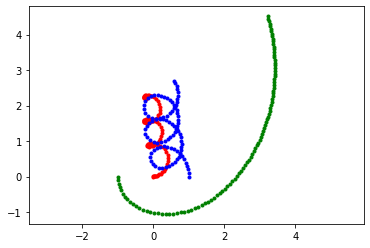

In [24]:
plt.figure()
plt.plot(rs[0,:,0],rs[0,:,1],'r.')  #rs[partícula,tiempo,coordenada]
plt.plot(rs[1,:,0],rs[1,:,1],'b.')
plt.plot(rs[2,:,0],rs[2,:,1],'g.')
plt.axis('equal') #Muy importante
plt.show()

In [27]:
!pip install -q celluloid

In [28]:
from celluloid import Camera

(-1.2209631705155495,
 3.6402265808265364,
 -1.3327472718629019,
 4.794230517687724)

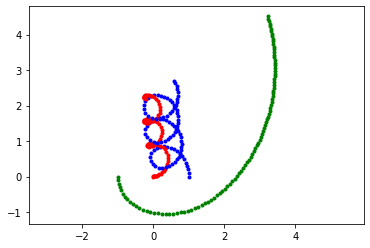

In [29]:
fig=plt.figure()
c=Camera(fig)

for i in range(len(ts)):  #debe graficarse para cada tiempo
    plt.plot(rs[0,i,0],rs[0,i,1],'r.')  
    plt.plot(rs[1,i,0],rs[1,i,1],'b.')
    plt.plot(rs[2,i,0],rs[2,i,1],'g.')
    c.snap()    #toma una foto en cada paso

    
plt.axis('equal')

In [30]:
anim = c.animate()

In [32]:
from IPython.display import HTML

In [34]:
HTML(anim.to_html5_video())    # Para resolver después

RuntimeError: Requested MovieWriter (ffmpeg) not available